<a href="https://colab.research.google.com/github/y-patankar/StockMarket/blob/main/Costo_Random_Data(all_data)(next_day).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.tseries.offsets import BDay
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('COST_Shuffled(all data).csv')

In [ ]:
df.set_index('Date', drop=False, inplace=True)
df

,Unnamed: 0,Date,Open,High,Low,Close,date-1,open-1,high-1,low-1,...,high-4,low-4,close-4,date-5,open-5,high-5,low-5,close-5,close-7day,close-14day
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-21,0,2016-06-21,157.070007,157.899994,156.660004,157.199997,2016-06-20,157.380005,158.380005,156.449997,...,156.779999,154.660004,154.860001,2016-06-14,154.550003,156.360001,153.570007,155.869995,154.869995,152.520004
2023-02-10,1,2023-02-10,498.510010,500.549988,495.380005,499.989990,2023-02-09,505.290009,509.160004,498.420013,...,517.219971,512.270020,515.590027,2023-02-03,519.130005,521.549988,512.500000,514.799988,517.909973,492.609985
2023-08-07,2,2023-08-07,554.989990,559.559998,554.989990,558.409973,2023-08-04,561.070007,561.289978,551.409973,...,562.880005,554.539978,555.469971,2023-07-31,563.000000,564.289978,559.049988,560.669983,561.830017,553.590027
2020-06-23,3,2020-06-23,301.730011,304.899994,300.730011,301.290009,2020-06-22,299.700012,301.480011,298.250000,...,302.000000,298.899994,299.609985,2020-06-16,301.350006,302.739990,299.220001,301.359985,298.700012,306.640015
2019-12-03,4,2019-12-03,295.130005,296.190002,292.700012,295.670013,2019-12-02,299.750000,300.200012,294.269989,...,301.350006,298.820007,301.239990,2019-11-25,300.290009,300.630005,297.549988,299.049988,300.269989,300.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-01-30,5659,2007-01-30,55.580002,55.830002,54.980000,55.299999,2007-01-29,54.990002,55.889999,54.660000,...,57.180000,56.480000,57.060001,2007-01-23,56.369999,57.139999,56.119999,56.439999,56.770000,54.029999
2010-12-15,5660,2010-12-15,71.010002,71.449997,70.889999,71.050003,2010-12-14,70.699997,71.540001,70.599998,...,71.129997,69.279999,71.019997,2010-12-08,69.379997,69.709999,68.529999,69.250000,69.190002,67.540001
2022-10-31,5661,2022-10-31,509.640015,509.640015,500.500000,501.500000,2022-10-28,497.299988,512.820007,495.970001,...,500.190002,490.500000,499.059998,2022-10-24,481.609985,498.000000,481.010010,496.970001,464.619995,472.019989


In [ ]:
df = df[['Open','Close', 'open-5', 'high-5','low-5','close-5','open-4', 'high-4','low-4','close-4','open-3', 'high-3','low-3','close-3','open-2', 'high-2','low-2','close-2','open-1', 'high-1','low-1','close-1','close-7day','close-14day']]
df

,Open,Close,open-5,high-5,low-5,close-5,open-4,high-4,low-4,close-4,...,open-2,high-2,low-2,close-2,open-1,high-1,low-1,close-1,close-7day,close-14day
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-21,157.070007,157.199997,154.550003,156.360001,153.570007,155.869995,155.699997,156.779999,154.660004,154.860001,...,157.029999,157.250000,155.759995,155.889999,157.380005,158.380005,156.449997,156.479996,154.869995,152.520004
2023-02-10,498.510010,499.989990,519.130005,521.549988,512.500000,514.799988,514.440002,517.219971,512.270020,515.590027,...,511.290009,512.179993,501.559998,503.809998,505.290009,509.160004,498.420013,500.630005,517.909973,492.609985
2023-08-07,554.989990,558.409973,563.000000,564.289978,559.049988,560.669983,560.630005,562.880005,554.539978,555.469971,...,553.530029,560.349976,552.219971,557.690002,561.070007,561.289978,551.409973,552.039978,561.830017,553.590027
2020-06-23,301.730011,301.290009,301.350006,302.739990,299.220001,301.359985,301.019989,302.000000,298.899994,299.609985,...,300.179993,301.899994,298.640015,299.899994,299.700012,301.480011,298.250000,300.450012,298.700012,306.640015
2019-12-03,295.130005,295.670013,300.290009,300.630005,297.549988,299.049988,299.260010,301.350006,298.820007,301.239990,...,300.820007,300.890015,299.660004,299.809998,299.750000,300.200012,294.269989,297.390015,300.269989,300.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-01-30,55.580002,55.299999,56.369999,57.139999,56.119999,56.439999,56.500000,57.180000,56.480000,57.060001,...,55.849998,55.849998,55.139999,55.360001,54.990002,55.889999,54.660000,55.270000,56.770000,54.029999
2010-12-15,71.010002,71.050003,69.379997,69.709999,68.529999,69.250000,69.699997,71.129997,69.279999,71.019997,...,71.129997,71.489998,70.529999,70.739998,70.699997,71.540001,70.599998,71.209999,69.190002,67.540001
2022-10-31,509.640015,501.500000,481.609985,498.000000,481.010010,496.970001,493.320007,500.190002,490.500000,499.059998,...,499.809998,503.010010,494.140015,496.540009,497.299988,512.820007,495.970001,510.869995,464.619995,472.019989


In [ ]:
columns_to_exclude = ['Open', 'Close','close-7day','close-14day']

# Select only the columns to include in calculations
columns_to_include = [col for col in df.columns if col not in columns_to_exclude]

# Calculate the minimum and maximum values for the selected columns
df['Row_Min'] = df[columns_to_include].min(axis=1)
df['Row_Max'] = df[columns_to_include].max(axis=1)

# Display the updated DataFrame
df

,Open,Close,open-5,high-5,low-5,close-5,open-4,high-4,low-4,close-4,...,low-2,close-2,open-1,high-1,low-1,close-1,close-7day,close-14day,Row_Min,Row_Max
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-21,157.070007,157.199997,154.550003,156.360001,153.570007,155.869995,155.699997,156.779999,154.660004,154.860001,...,155.759995,155.889999,157.380005,158.380005,156.449997,156.479996,154.869995,152.520004,153.570007,158.380005
2023-02-10,498.510010,499.989990,519.130005,521.549988,512.500000,514.799988,514.440002,517.219971,512.270020,515.590027,...,501.559998,503.809998,505.290009,509.160004,498.420013,500.630005,517.909973,492.609985,498.420013,521.549988
2023-08-07,554.989990,558.409973,563.000000,564.289978,559.049988,560.669983,560.630005,562.880005,554.539978,555.469971,...,552.219971,557.690002,561.070007,561.289978,551.409973,552.039978,561.830017,553.590027,551.020020,564.289978
2020-06-23,301.730011,301.290009,301.350006,302.739990,299.220001,301.359985,301.019989,302.000000,298.899994,299.609985,...,298.640015,299.899994,299.700012,301.480011,298.250000,300.450012,298.700012,306.640015,297.790009,302.739990
2019-12-03,295.130005,295.670013,300.290009,300.630005,297.549988,299.049988,299.260010,301.350006,298.820007,301.239990,...,299.660004,299.809998,299.750000,300.200012,294.269989,297.390015,300.269989,300.500000,294.269989,302.790009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007-01-30,55.580002,55.299999,56.369999,57.139999,56.119999,56.439999,56.500000,57.180000,56.480000,57.060001,...,55.139999,55.360001,54.990002,55.889999,54.660000,55.270000,56.770000,54.029999,54.660000,57.180000
2010-12-15,71.010002,71.050003,69.379997,69.709999,68.529999,69.250000,69.699997,71.129997,69.279999,71.019997,...,70.529999,70.739998,70.699997,71.540001,70.599998,71.209999,69.190002,67.540001,68.529999,71.540001
2022-10-31,509.640015,501.500000,481.609985,498.000000,481.010010,496.970001,493.320007,500.190002,490.500000,499.059998,...,494.140015,496.540009,497.299988,512.820007,495.970001,510.869995,464.619995,472.019989,481.010010,512.820007


In [ ]:
if 'Open' not in df.columns:
    print("Column 'Open' not found.")
else:

    normalized_df = df.copy()

    # Exclude columns that should not be normalized (e.g., 'Date')
    exclude_columns = ['Date','Index']
    columns_to_normalize = [col for col in normalized_df.columns if col not in exclude_columns]

    # Perform row-wise division
    normalized_df[columns_to_normalize] = normalized_df[columns_to_normalize].div(normalized_df['Open'], axis=0)

    # Step 3: Handle potential division by zero errors
    # Replace infinite values with NaN or another placeholder
    normalized_df.replace([np.inf, -np.inf], np.nan, inplace=True)


    print(normalized_df.head())

            Open     Price    open-5    high-5     low-5   close-5    open-4  \
Date                                                                           
02/09/2012   1.0  1.003065  0.993870  1.019247  0.993870  1.014711  1.021822   
06/20/2003   1.0  0.997430  0.989149  0.992290  0.960023  0.963735  0.968875   
03/18/2005   1.0  0.989937  1.018020  1.027381  1.012169  1.018020  1.017084   
03/09/2005   1.0  0.992804  0.988307  1.002698  0.964470  0.979987  0.981561   
12/23/2011   1.0  1.011604  0.992594  0.999259  0.983582  0.986545  0.989261   

              high-4     low-4   close-4  ...    open-2    high-2     low-2  \
Date                                      ...                                 
02/09/2012  1.022680  1.008336  1.012872  ...  1.004659  1.008582  1.001226   
06/20/2003  0.991719  0.962022  0.986008  ...  0.993147  1.003427  0.981439   
03/18/2005  1.035338  1.015680  1.034402  ...  1.020594  1.023403  1.007489   
03/09/2005  0.984934  0.973690  0.975039  ..

In [ ]:
exclude_columns = ['Date']

# Get the list of columns to multiply
columns_to_multiply = [col for col in normalized_df.columns if col not in exclude_columns]

# Multiply the selected columns by 10
normalized_df[columns_to_multiply] = normalized_df[columns_to_multiply].mul(10)

In [ ]:
normalized_df

,Open,Price,open-5,high-5,low-5,close-5,open-4,high-4,low-4,close-4,...,open-2,high-2,low-2,close-2,open-1,high-1,low-1,close-1,close-7day,close-14day
Date,,,,,,,,,,,,,,,,,,,,,
02/09/2012,10.0,10.030649,9.938703,10.192473,9.938703,10.147113,10.218217,10.226799,10.083364,10.128724,...,10.046586,10.085816,10.012259,10.034326,10.020841,10.038004,9.949736,10.001226,9.762167,9.660414
06/20/2003,10.0,9.974300,9.891491,9.922901,9.600228,9.637350,9.688749,9.917190,9.620217,9.860080,...,9.931468,10.034266,9.814392,10.017133,9.988578,10.068532,9.800114,9.834380,9.751571,10.316962
03/18/2005,10.0,9.899368,10.180201,10.273812,10.121694,10.180201,10.170840,10.353382,10.156799,10.344021,...,10.205944,10.234028,10.074889,10.114674,10.079569,10.114674,9.981278,10.000000,10.332319,10.554645
03/09/2005,10.0,9.928041,9.883067,10.026984,9.644704,9.799865,9.815606,9.849337,9.736901,9.750394,...,9.777378,9.826850,9.658197,9.694176,9.750394,10.148415,9.685181,10.024736,10.141669,10.215876
12/23/2011,10.0,10.116035,9.925935,9.992594,9.835823,9.865449,9.892606,9.962968,9.780274,9.804962,...,9.987656,10.085175,9.912356,10.011110,10.030860,10.037032,9.939514,10.008641,9.887668,10.418467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
05/17/2007,10.0,10.137554,10.114943,10.252497,9.960430,10.022612,9.949124,10.148860,9.934049,10.026380,...,10.003769,10.064066,9.862446,9.886942,9.917091,9.998116,9.858677,9.996231,9.960430,9.932165
02/26/2010,10.0,9.936016,9.897289,10.000000,9.885503,9.964641,10.006735,10.015154,9.890554,9.907392,...,9.909076,9.978111,9.878767,9.919178,9.826570,10.026941,9.813100,10.006735,9.949486,9.547062
08/07/2012,10.0,9.904935,9.940184,9.985046,9.880367,9.944456,9.970092,10.045930,9.886776,9.918821,...,10.028840,10.068361,9.998932,10.050203,10.046999,10.049135,9.969024,9.977569,10.040590,9.920957


In [ ]:
df= normalized_df

In [ ]:
X = df.drop(columns=['Close','Open','close-7day','close-14day'])
y = df['Close']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split temp into validation (10%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Checking the size of each set
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (4531, 22), (4531,)
Validation set: (566, 22), (566,)
Test set: (567, 22), (567,)


In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=True)

[0]	validation_0-rmse:127.34447
[1]	validation_0-rmse:89.43130
[2]	validation_0-rmse:63.16973
[3]	validation_0-rmse:44.77419
[4]	validation_0-rmse:31.78168
[5]	validation_0-rmse:22.51892
[6]	validation_0-rmse:16.26811
[7]	validation_0-rmse:11.88862
[8]	validation_0-rmse:8.99064
[9]	validation_0-rmse:7.18953
[10]	validation_0-rmse:6.02926
[11]	validation_0-rmse:5.47369
[12]	validation_0-rmse:5.13848
[13]	validation_0-rmse:5.00567
[14]	validation_0-rmse:4.90602
[15]	validation_0-rmse:4.83300
[16]	validation_0-rmse:4.79665


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:4.80822
[18]	validation_0-rmse:4.74983
[19]	validation_0-rmse:4.73694
[20]	validation_0-rmse:4.73054
[21]	validation_0-rmse:4.62744
[22]	validation_0-rmse:4.61902
[23]	validation_0-rmse:4.60162
[24]	validation_0-rmse:4.61252
[25]	validation_0-rmse:4.57917
[26]	validation_0-rmse:4.57798
[27]	validation_0-rmse:4.57964
[28]	validation_0-rmse:4.56919
[29]	validation_0-rmse:4.55443
[30]	validation_0-rmse:4.54592
[31]	validation_0-rmse:4.54848
[32]	validation_0-rmse:4.54009
[33]	validation_0-rmse:4.54136
[34]	validation_0-rmse:4.54933
[35]	validation_0-rmse:4.54898
[36]	validation_0-rmse:4.54409
[37]	validation_0-rmse:4.54098
[38]	validation_0-rmse:4.52804
[39]	validation_0-rmse:4.56594
[40]	validation_0-rmse:4.57651
[41]	validation_0-rmse:4.56855
[42]	validation_0-rmse:4.55178
[43]	validation_0-rmse:4.58351
[44]	validation_0-rmse:4.56992
[45]	validation_0-rmse:4.56291
[46]	validation_0-rmse:4.56181
[47]	validation_0-rmse:4.56419
[48]	validation_0-rmse:4.56363


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the validation set
y_val_pred = xgb_model.predict(X_val)

# Calculate Mean Squared Error on the validation set
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation Mean Squared Error: {val_mse}")

Validation Mean Squared Error: 20.503188944189365


In [ ]:
# Make predictions on the test set
y_test_pred = xgb_model.predict(X_test)

# Calculate Mean Squared Error on the test set
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse}")

Test Mean Squared Error: 21.536146553402627


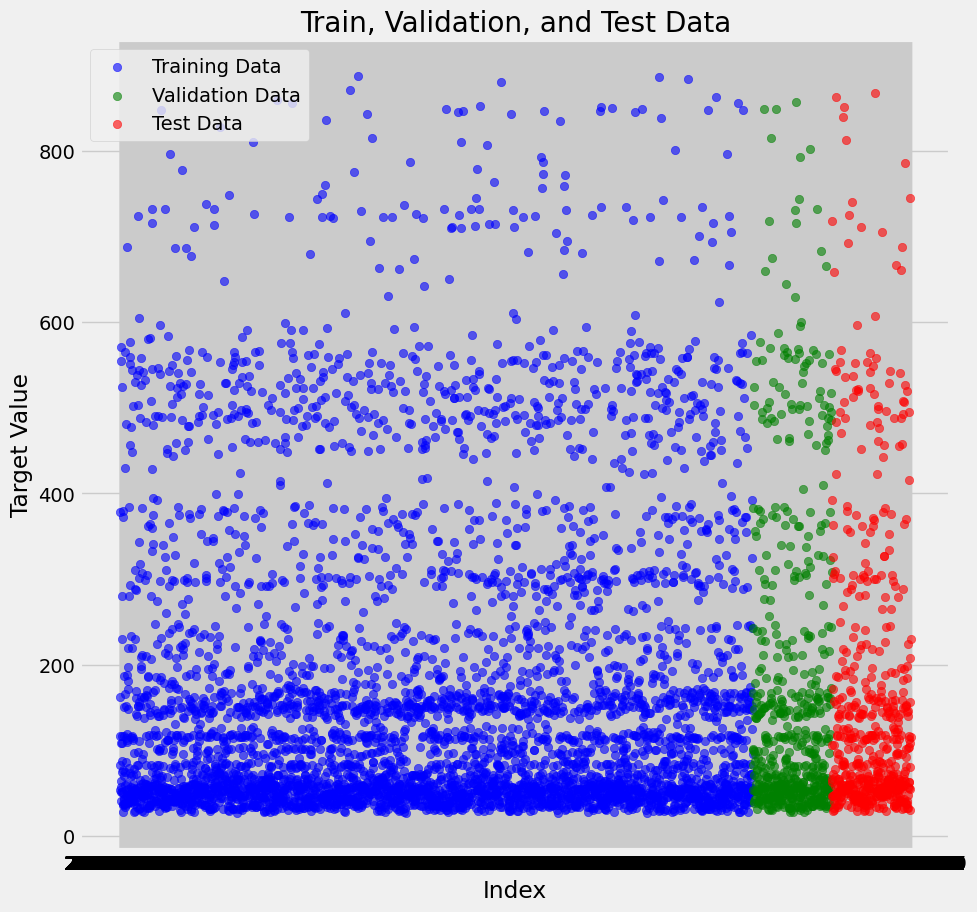

In [ ]:
# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined

plt.figure(figsize=(10, 10))

# Plot training data
plt.scatter(X_train.index, y_train, color='blue', label='Training Data', alpha=0.6)

# Plot validation data
plt.scatter(X_val.index, y_val, color='green', label='Validation Data', alpha=0.6)

# Plot test data
plt.scatter(X_test.index, y_test, color='red', label='Test Data', alpha=0.6)

# Add title and labels
plt.title('Train, Validation, and Test Data')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()

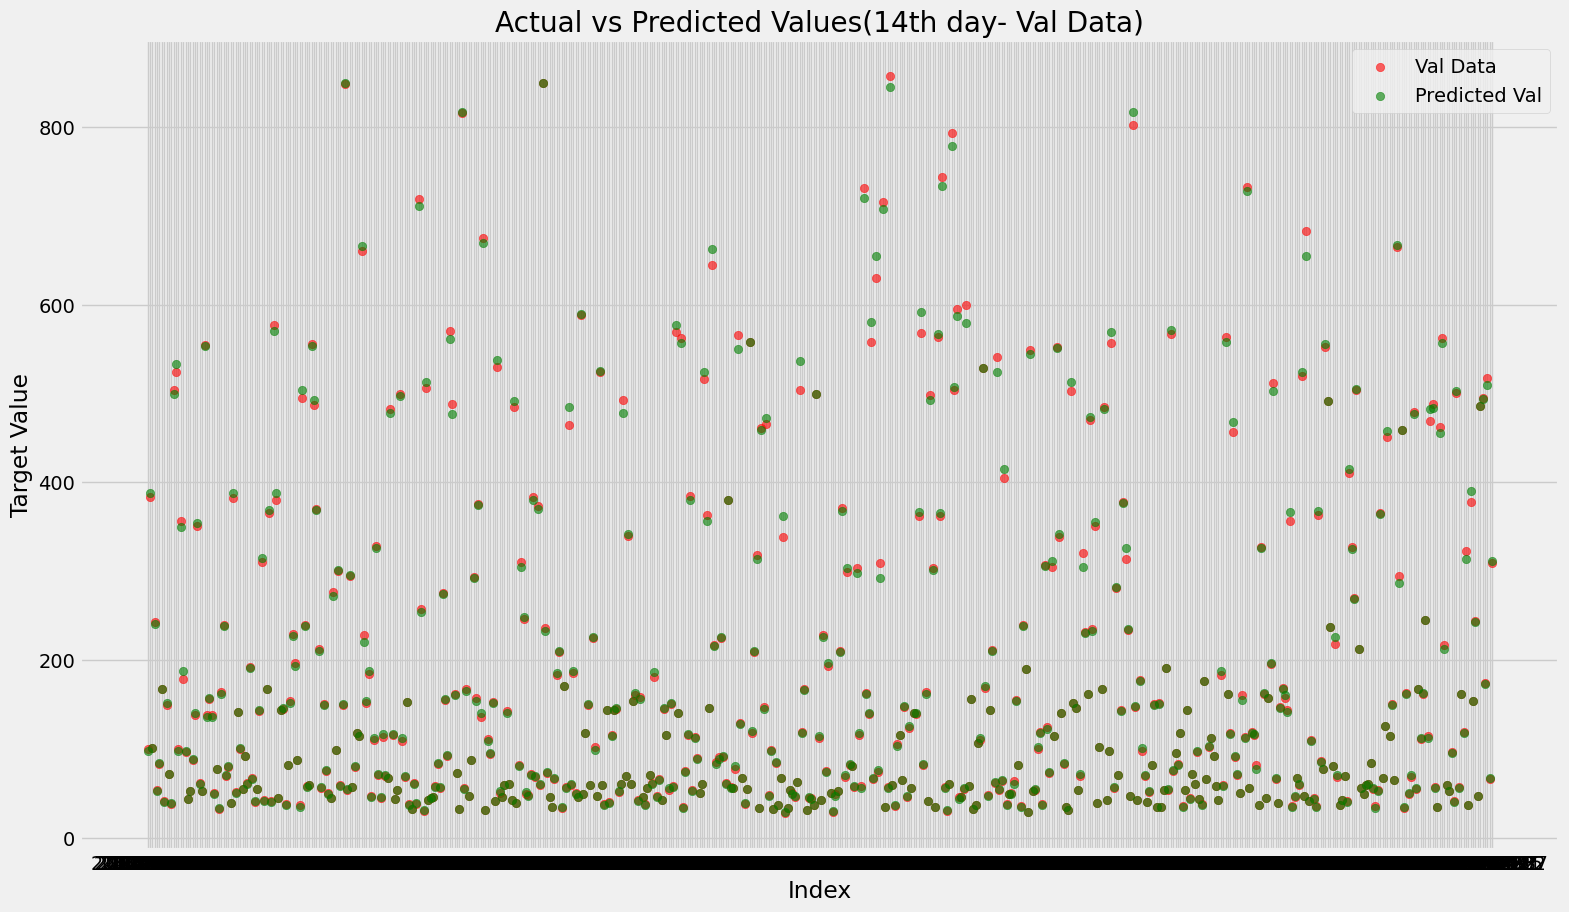

In [ ]:
#normalised data

plt.figure(figsize=(17, 10))
plt.scatter(X_val.index, y_val, color='red', label='Val Data', alpha=0.6)
plt.scatter(X_val.index, y_val_pred, color='green', label='Predicted Val', alpha=0.6)
plt.title('Actual vs Predicted Values(14th day- Val Data)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()

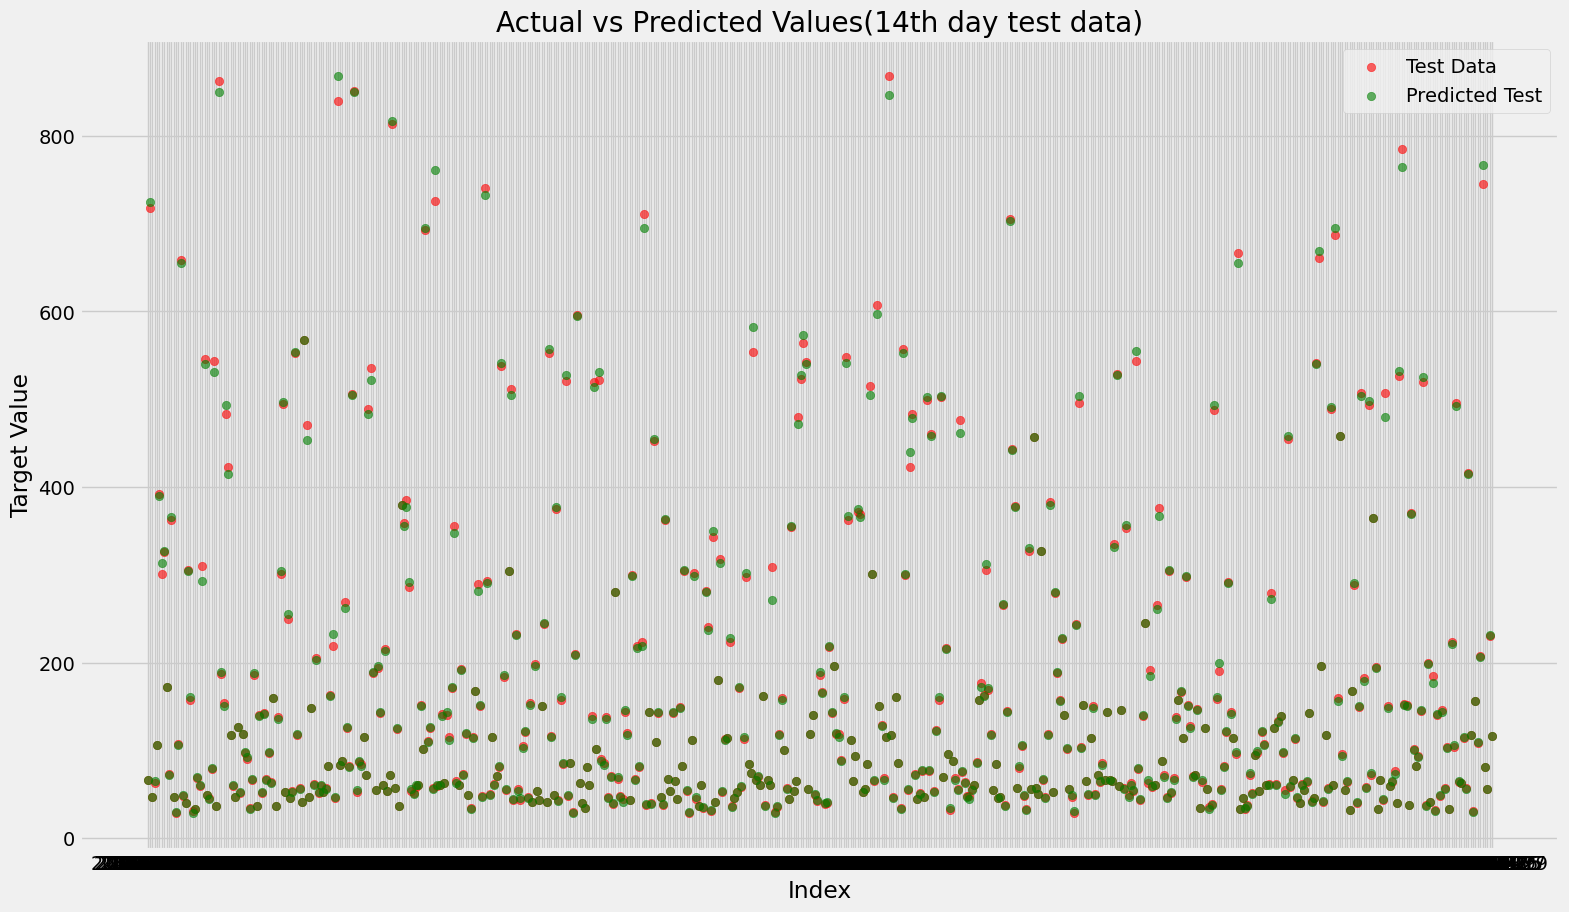

In [ ]:
#test data
plt.figure(figsize=(17, 10))
plt.scatter(X_test.index, y_test, color='red', label='Test Data', alpha=0.6)
plt.scatter(X_test.index, y_test_pred, color='green', label='Predicted Test', alpha=0.6)
plt.title('Actual vs Predicted Values(14th day test data)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
paired_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

paired_data

,Actual,Predicted
Date,,
2008-03-26,66.620003,66.482819
2024-04-15,718.280029,725.141602
2009-04-28,47.070000,47.159721
2007-08-09,63.240002,65.311394
2013-03-28,106.110001,105.922539
...,...,...
2024-02-26,745.349976,766.875183
2011-11-25,80.820000,80.543480
2006-05-15,55.549999,55.618092


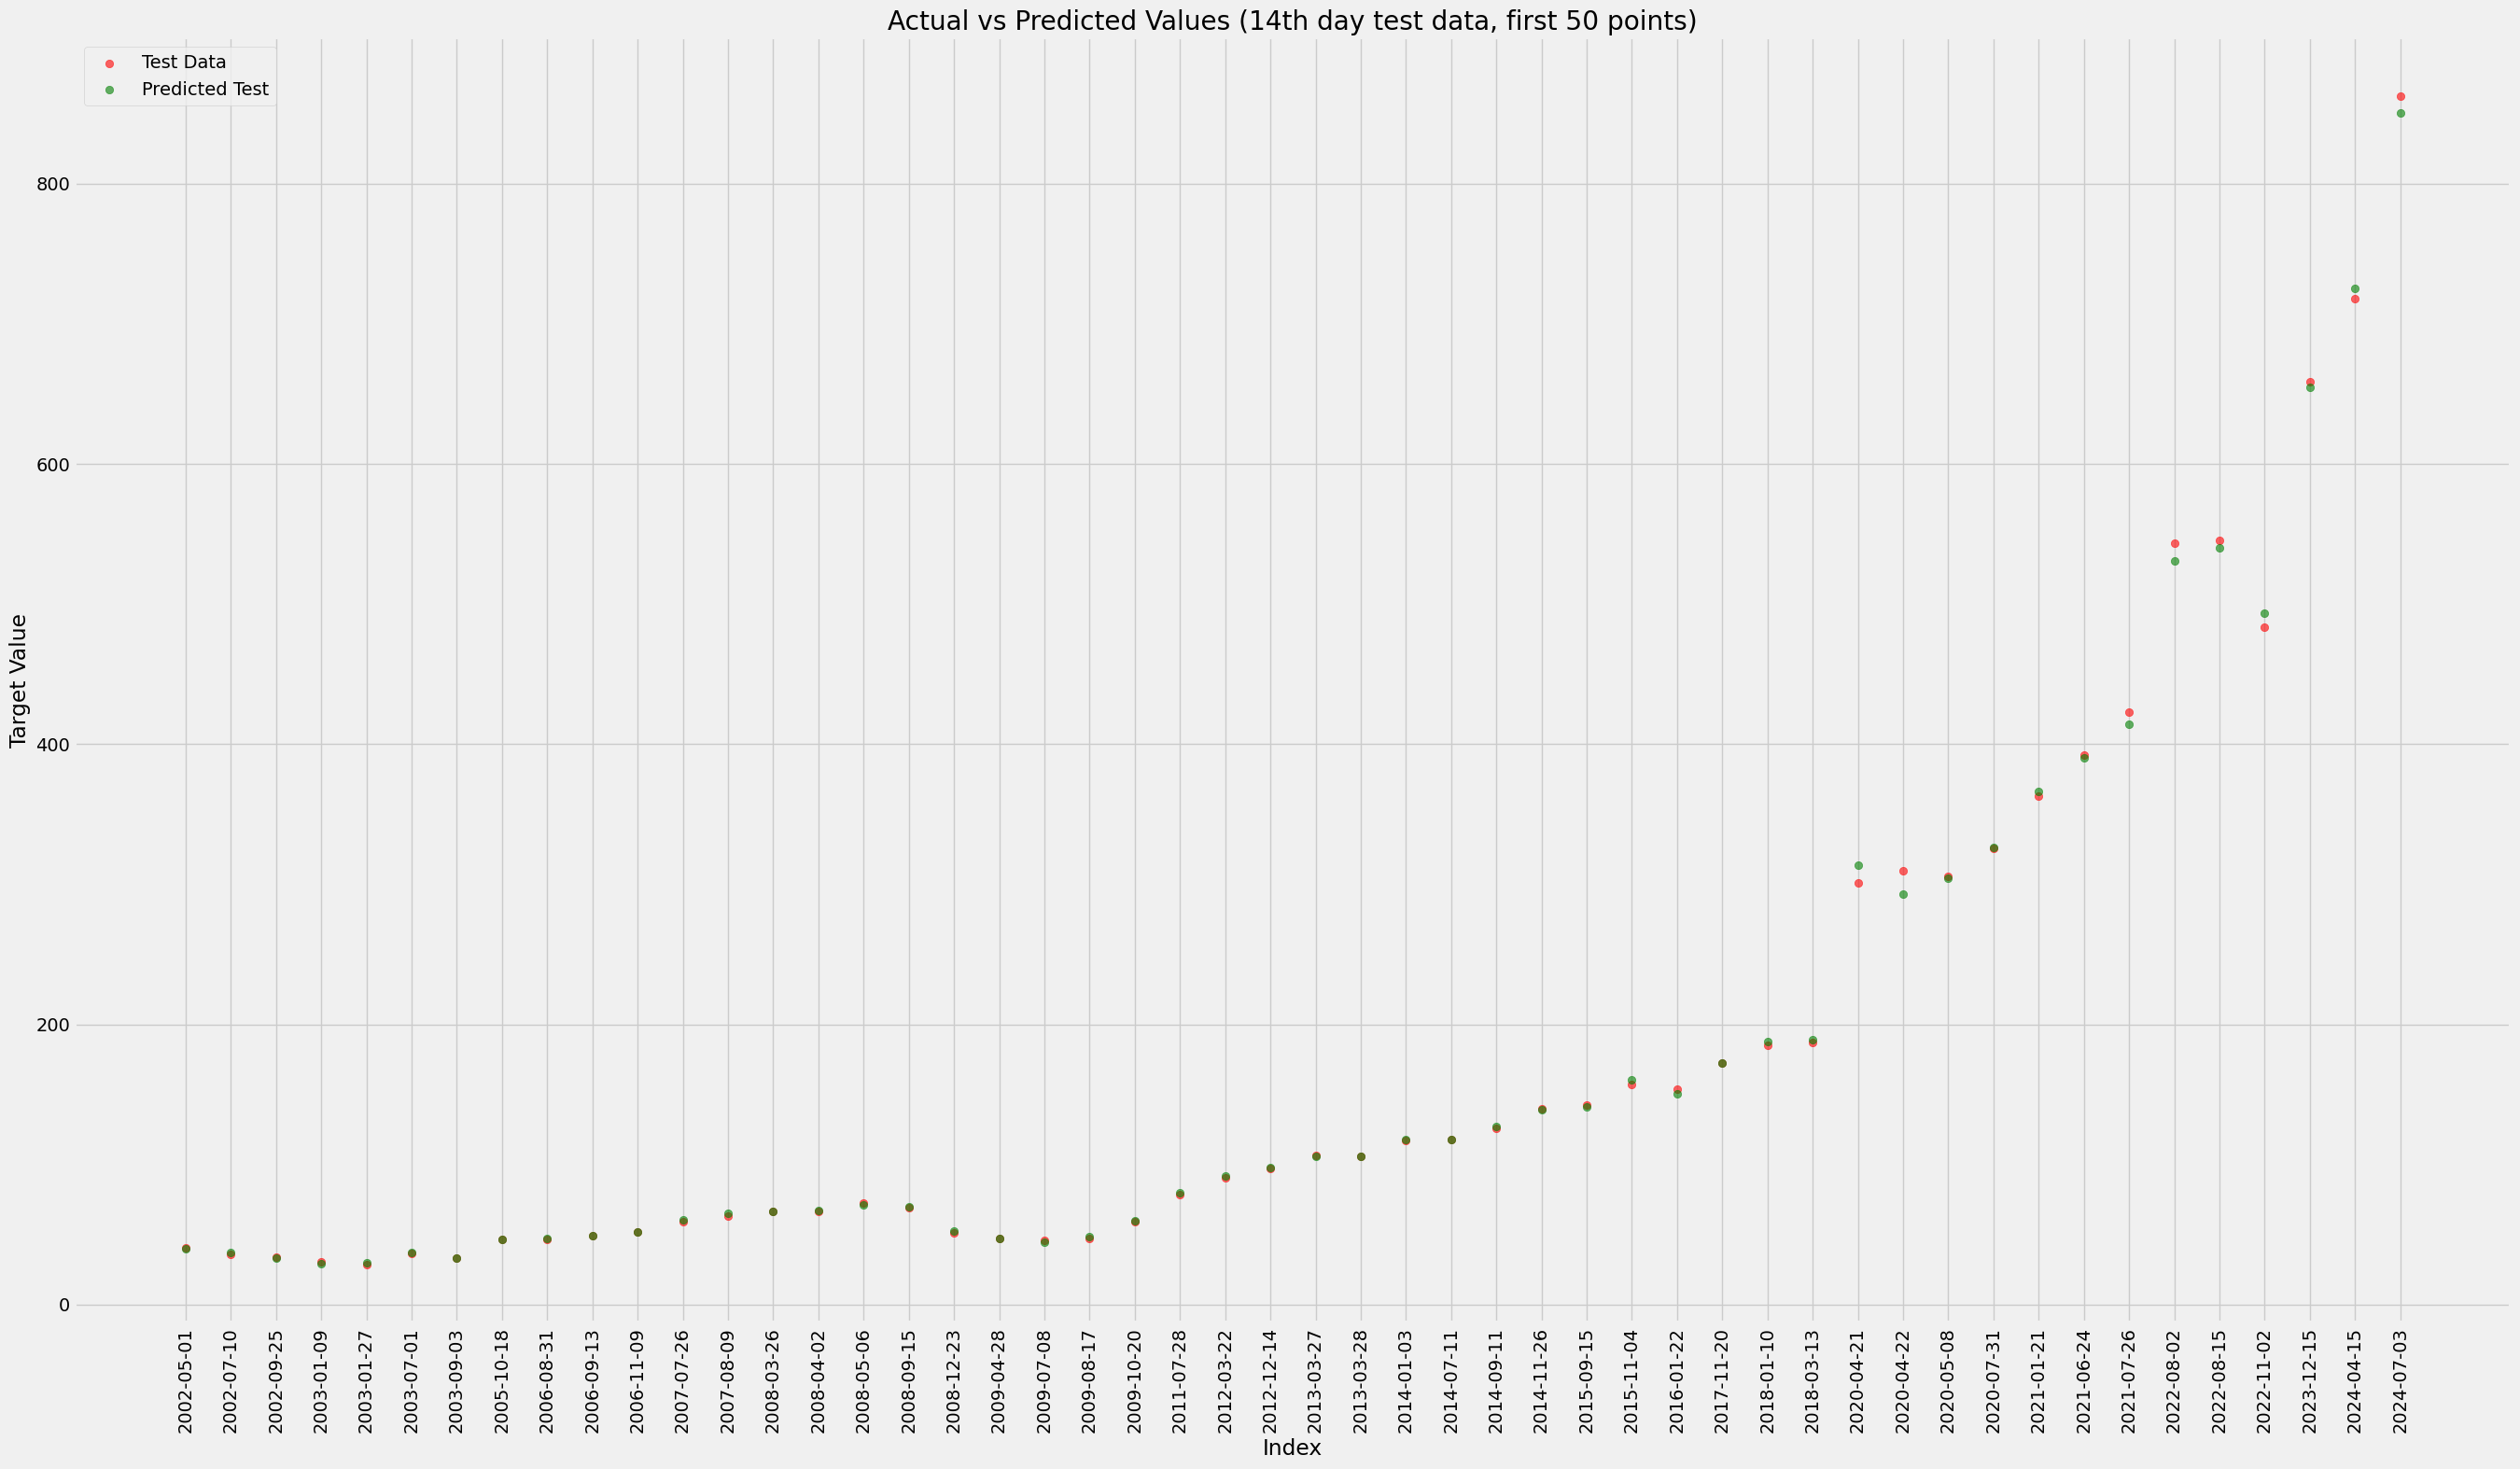

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_test_pred to a Pandas Series and create an index for it
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Create DataFrames/Series with the same index
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Plot the subset of the data
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index, y_test_subset, color='red', label='Test Data', alpha=0.6)
plt.scatter(X_test_subset.index, y_test_pred_subset, color='green', label='Predicted Test', alpha=0.6)
plt.title('Actual vs Predicted Values (14th day test data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()


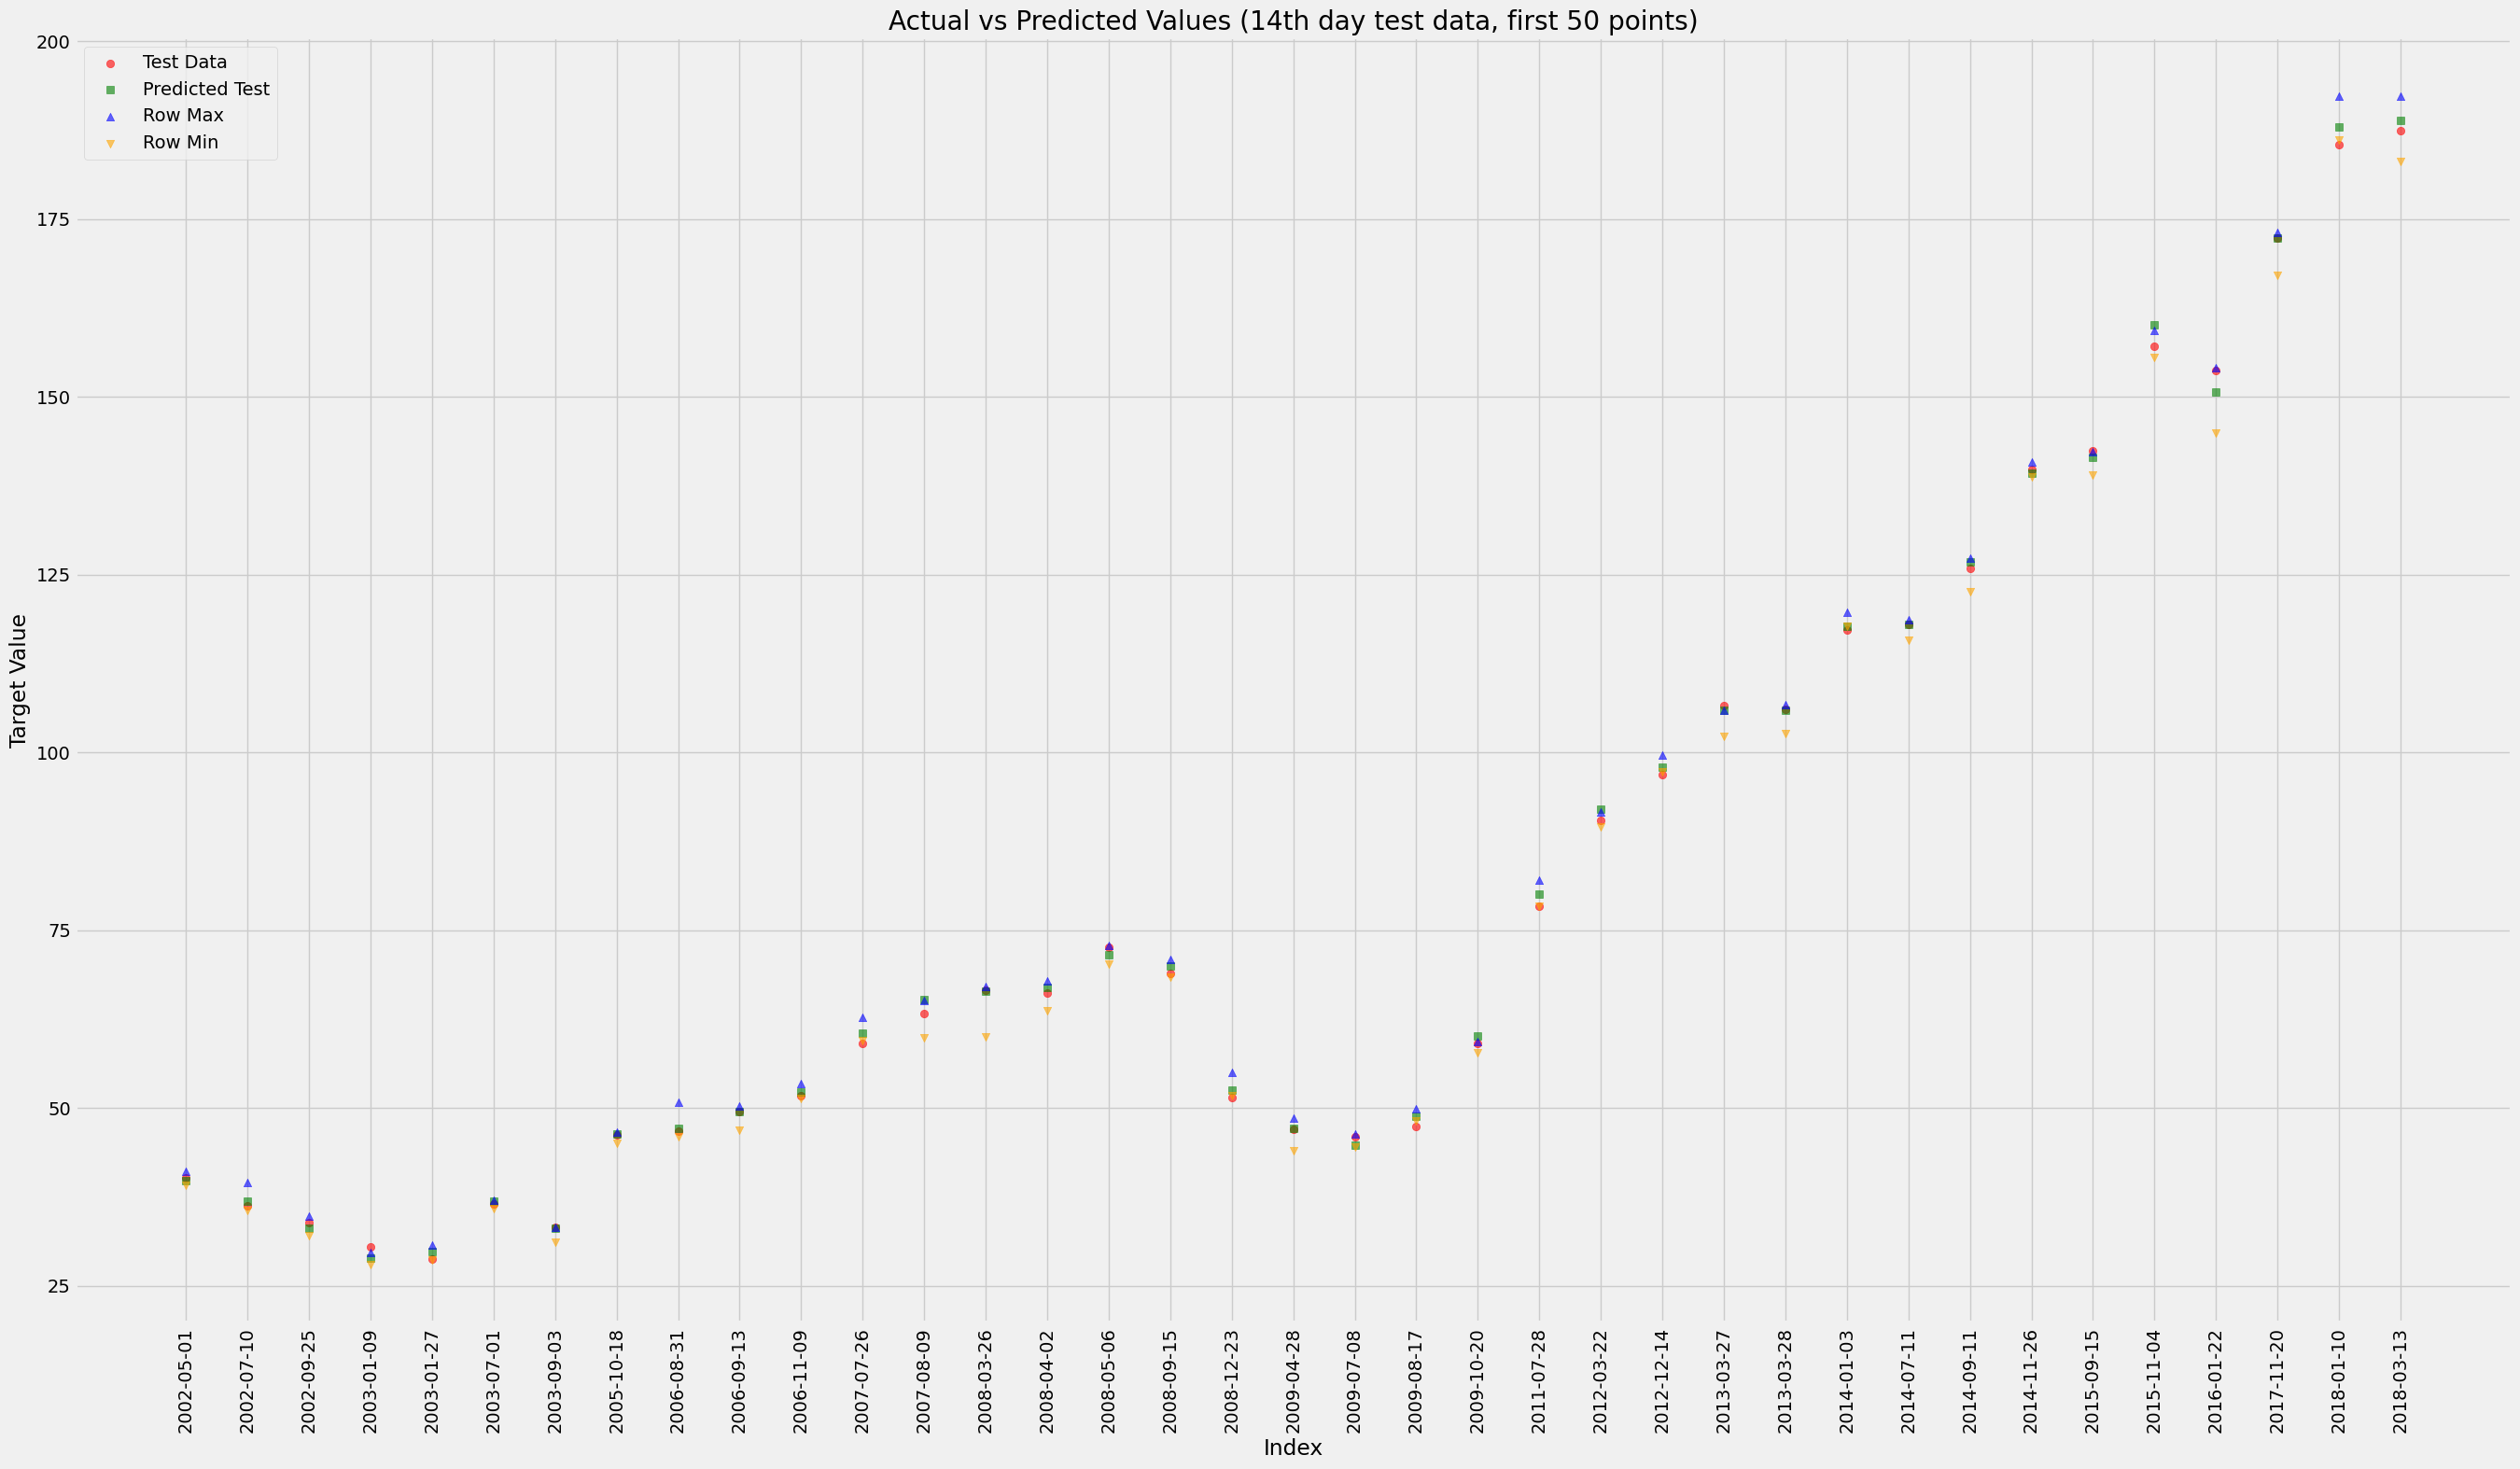

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_test_pred to a Pandas Series and create an index for it
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Create DataFrames/Series with the same index
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Extract Row_Max and Row_Min for plotting
row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']

# Plot the subset of the data
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[0:37], y_test_subset[0:37], color='red', label='Test Data', alpha=0.6, marker='o')
plt.scatter(X_test_subset.index[0:37], y_test_pred_subset[0:37], color='green', label='Predicted Test', alpha=0.6, marker='s')
plt.scatter(X_test_subset.index[0:37], row_max_subset[0:37], color='blue', label='Row Max', alpha=0.6, marker='^')
plt.scatter(X_test_subset.index[0:37], row_min_subset[0:37], color='orange', label='Row Min', alpha=0.6, marker='v')
plt.title('Actual vs Predicted Values (14th day test data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()

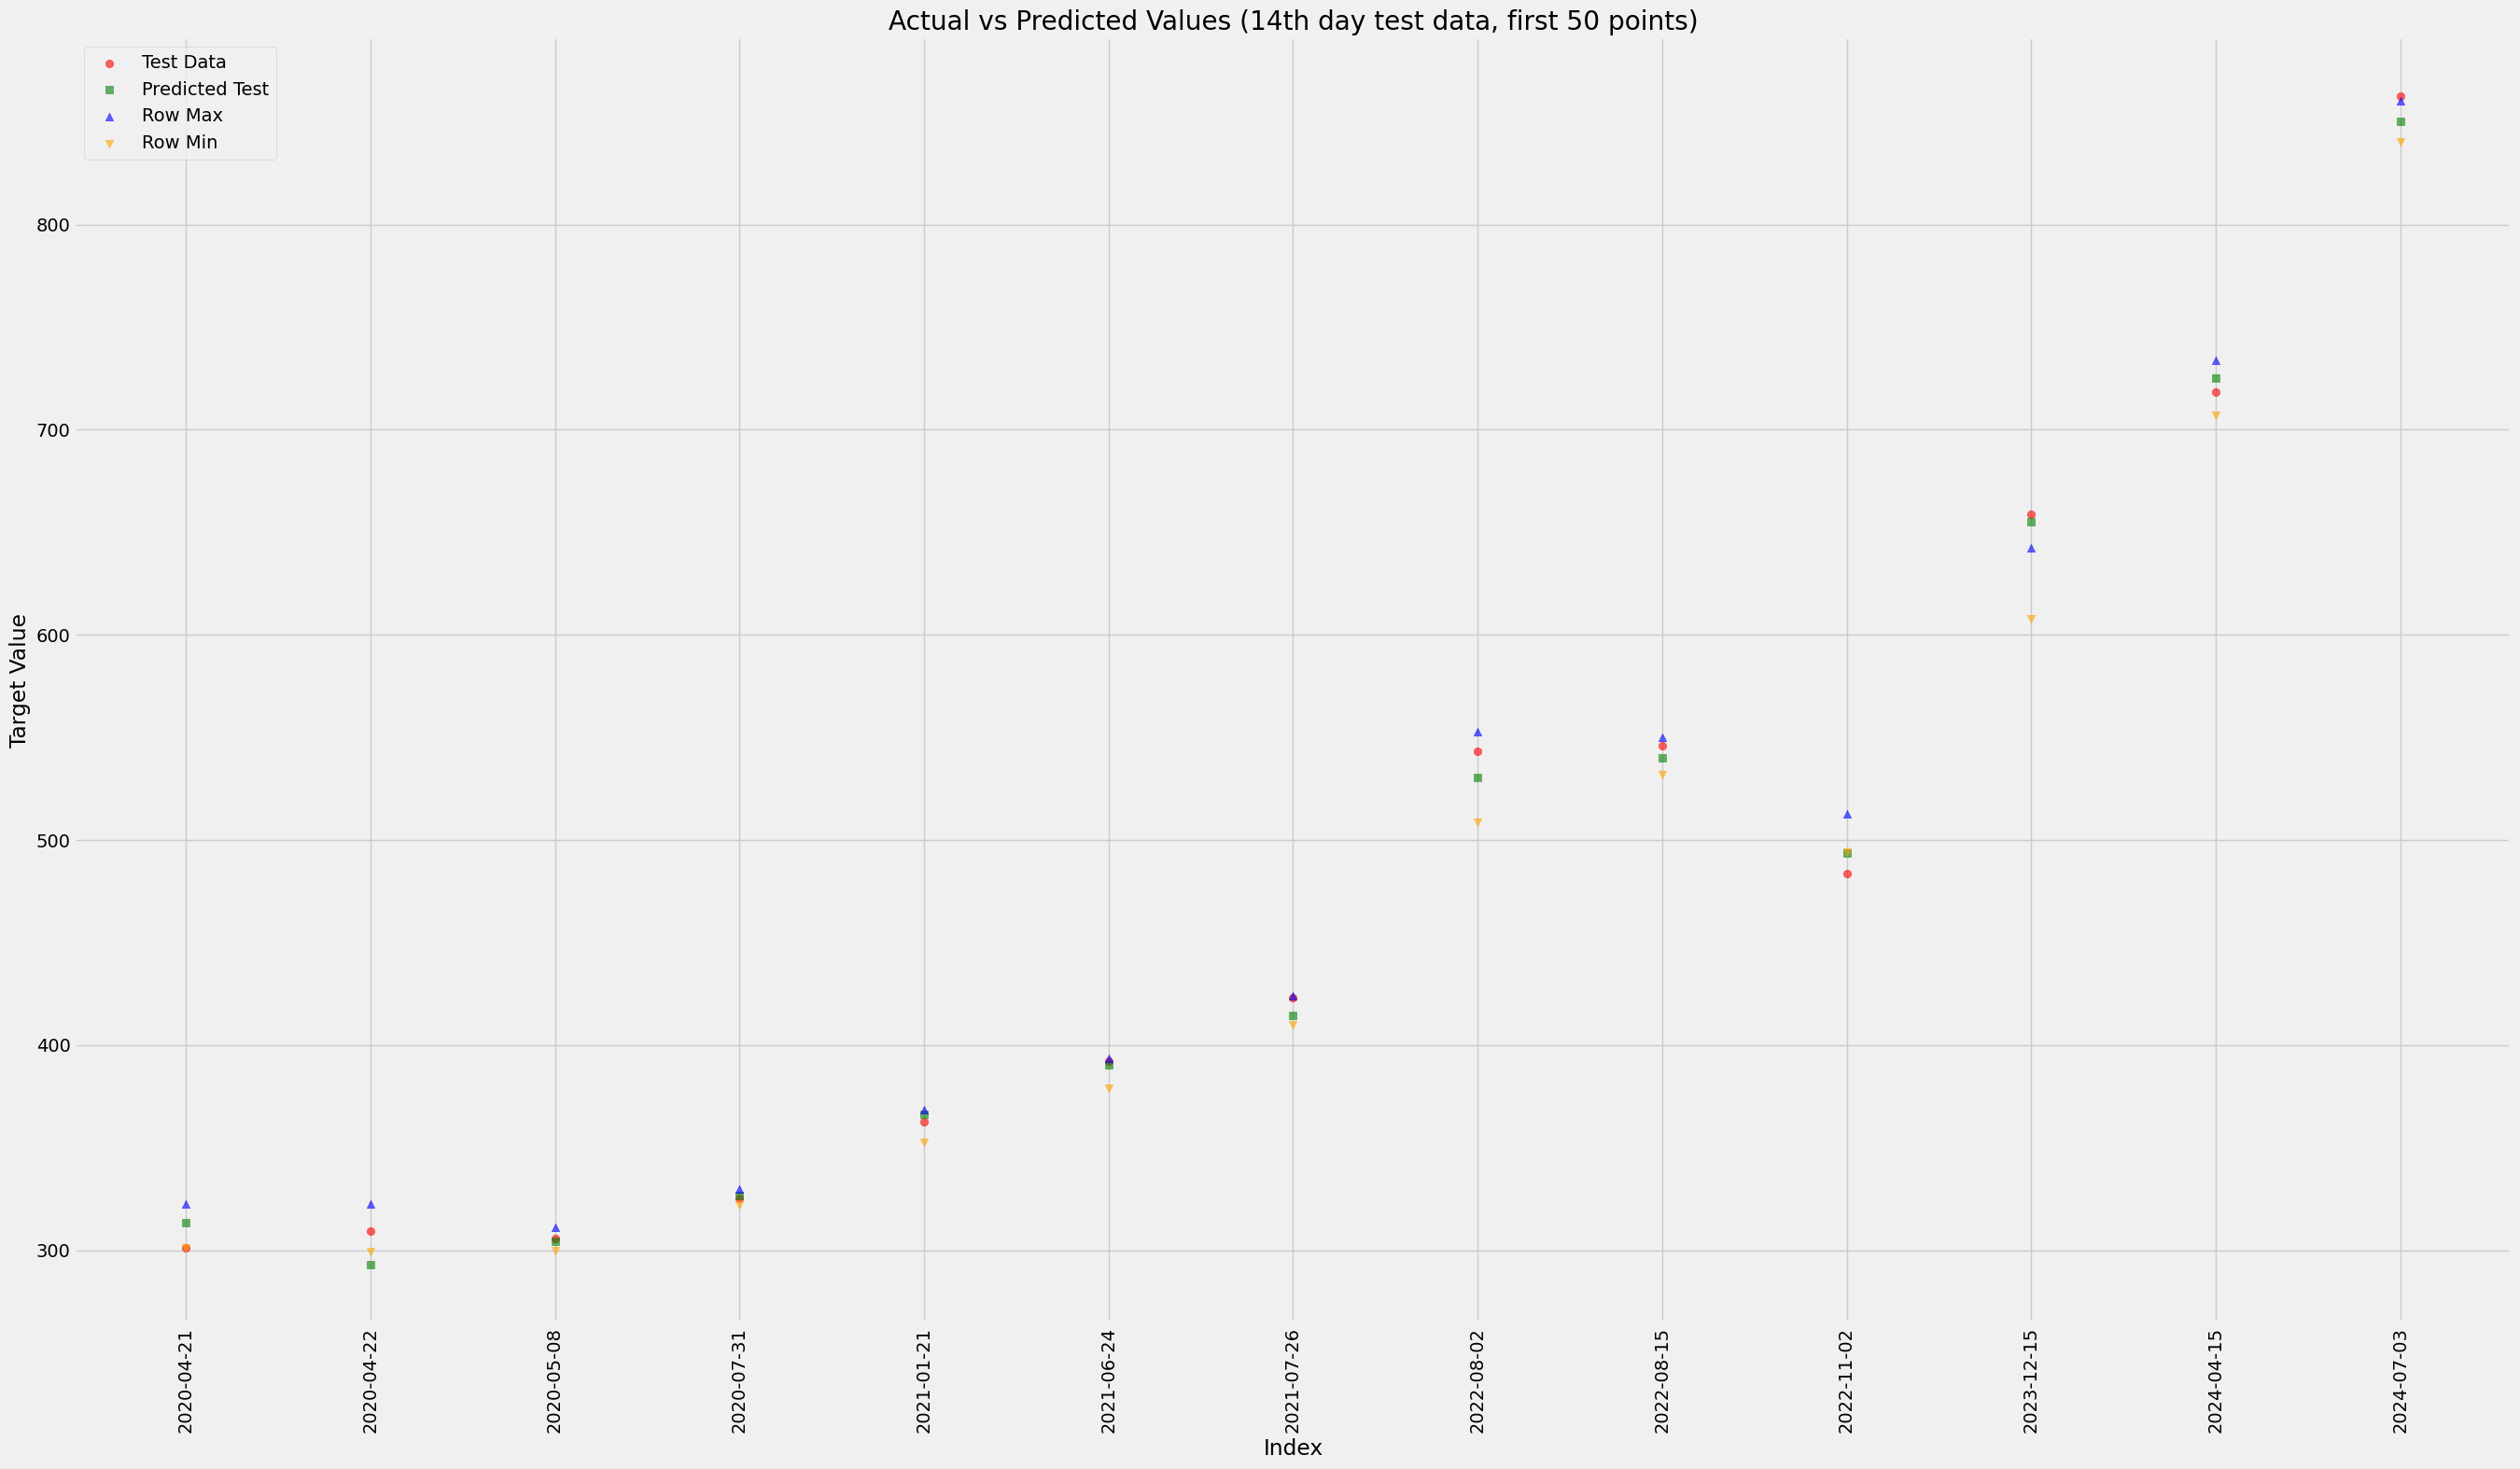

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert y_test_pred to a Pandas Series and create an index for it
y_test_pred_series = pd.Series(y_test_pred[:50], index=X_test.iloc[:50].index)

# Create DataFrames/Series with the same index
X_test_subset = X_test.iloc[:50].sort_index()
y_test_subset = pd.Series(y_test[:50], index=X_test_subset.index).sort_index()
y_test_pred_subset = y_test_pred_series.sort_index()

# Extract Row_Max and Row_Min for plotting
row_max_subset = X_test_subset['Row_Max']
row_min_subset = X_test_subset['Row_Min']

# Plot the subset of the data
plt.figure(figsize=(30, 17))
plt.scatter(X_test_subset.index[37:50], y_test_subset[37:50], color='red', label='Test Data', alpha=0.6, marker='o')
plt.scatter(X_test_subset.index[37:50], y_test_pred_subset[37:50], color='green', label='Predicted Test', alpha=0.6, marker='s')
plt.scatter(X_test_subset.index[37:50], row_max_subset[37:50], color='blue', label='Row Max', alpha=0.6, marker='^')
plt.scatter(X_test_subset.index[37:50], row_min_subset[37:50], color='orange', label='Row Min', alpha=0.6, marker='v')
plt.title('Actual vs Predicted Values (14th day test data, first 50 points)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Rotate x-axis tick labels to be vertical
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
paired_data_50 = pd.DataFrame({
    'Actual': y_test_subset,
    'Predicted': y_test_pred_subset,
    'Max': X_test['Row_Max'].iloc[:50],
    'Min': X_test['Row_Min'].iloc[:50]
})
paired_data_50

,Actual,Predicted,Max,Min
Date,,,,
2002-05-01,40.270000,39.838890,41.110001,39.200001
2002-07-10,36.209999,36.930916,39.549999,35.650002
2002-09-25,33.950001,33.157738,34.869999,32.090000
2003-01-09,30.549999,28.942526,29.690001,28.040001
2003-01-27,28.770000,29.882685,30.730000,28.690001
2003-07-01,36.509998,36.930916,37.000000,35.820000
2003-09-03,33.259998,33.157738,33.230000,31.190001
2005-10-18,46.310001,46.389549,46.619999,45.049999
2006-08-31,46.790001,47.155361,50.880001,46.000000


**Without Normalizing with Open Values**



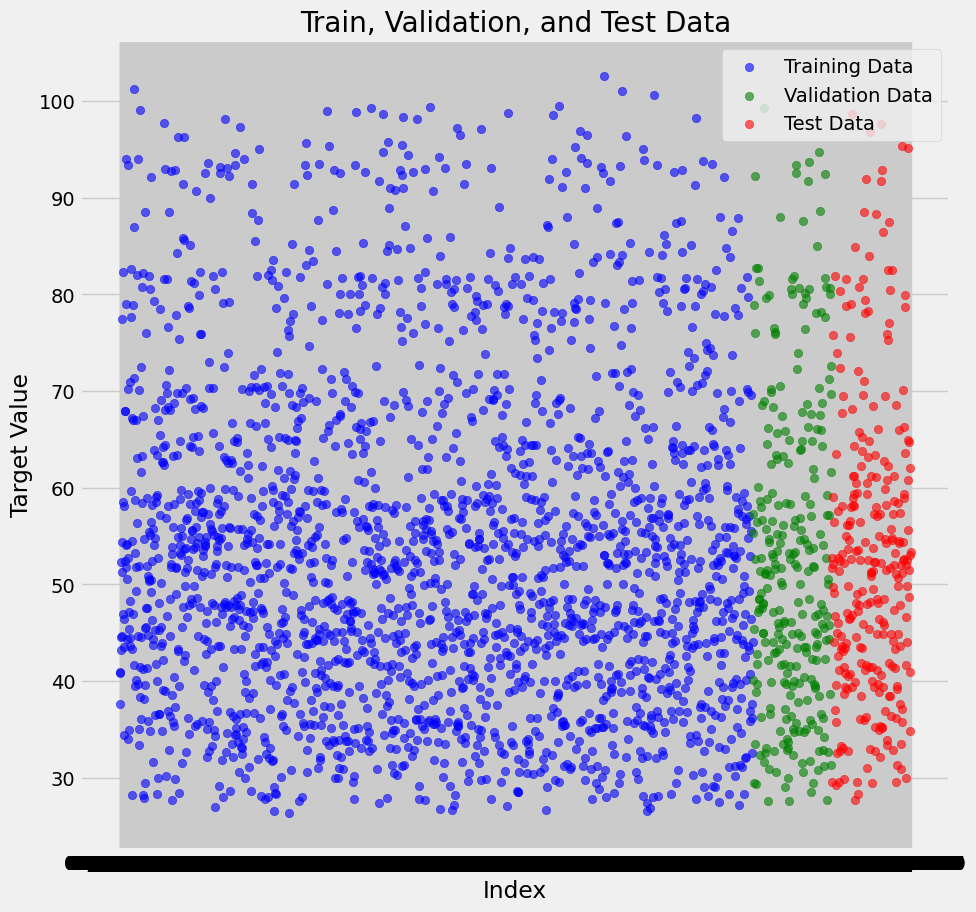

In [ ]:
# Assuming X_train, X_val, X_test, y_train, y_val, y_test are already defined

plt.figure(figsize=(10, 10))

# Plot training data
plt.scatter(X_train.index, y_train, color='blue', label='Training Data', alpha=0.6)

# Plot validation data
plt.scatter(X_val.index, y_val, color='green', label='Validation Data', alpha=0.6)

# Plot test data
plt.scatter(X_test.index, y_test, color='red', label='Test Data', alpha=0.6)

# Add title and labels
plt.title('Train, Validation, and Test Data')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()

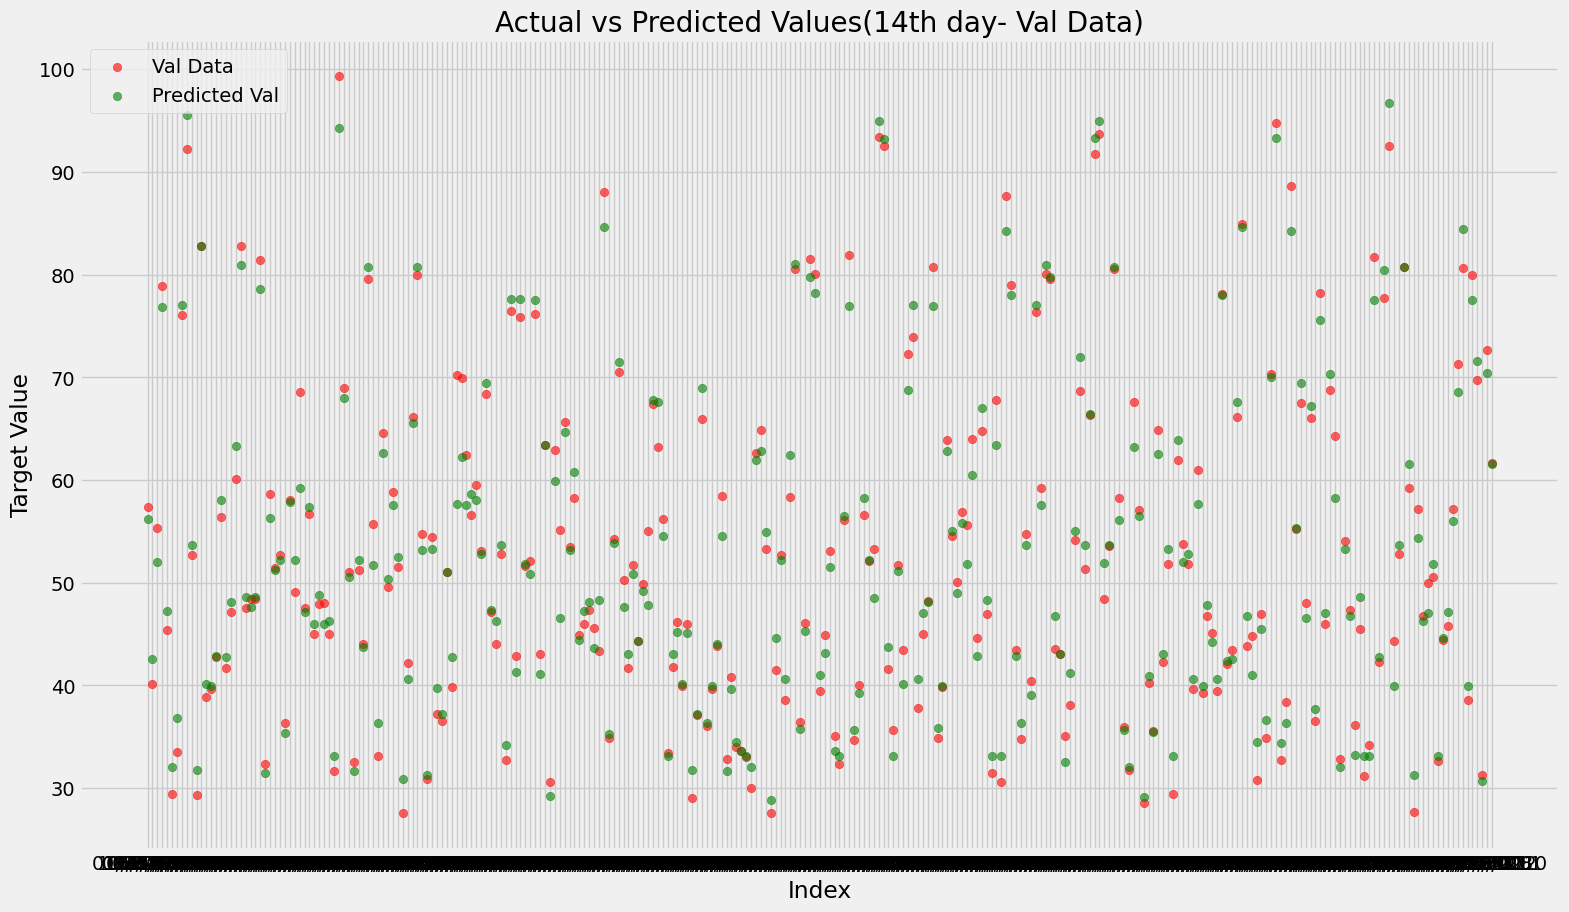

In [ ]:
# not normalised data

plt.figure(figsize=(17, 10))
plt.scatter(X_val.index, y_val, color='red', label='Val Data', alpha=0.6)
plt.scatter(X_val.index, y_val_pred, color='green', label='Predicted Val', alpha=0.6)
plt.title('Actual vs Predicted Values(14th day- Val Data)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()

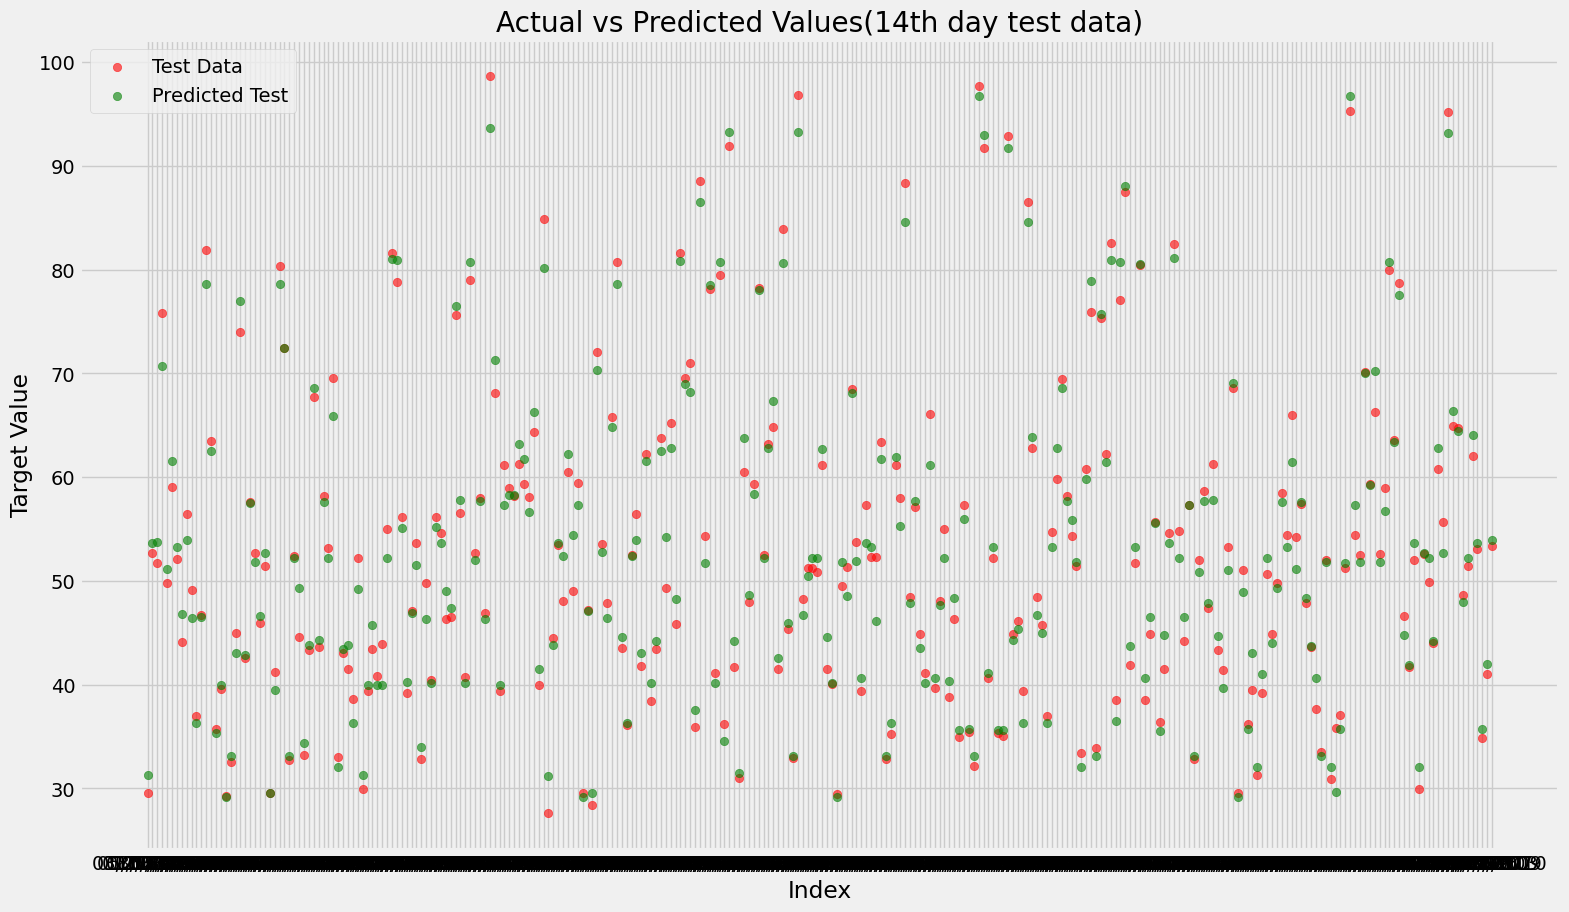

In [ ]:
#test data
plt.figure(figsize=(17, 10))
plt.scatter(X_test.index, y_test, color='red', label='Test Data', alpha=0.6)
plt.scatter(X_test.index, y_test_pred, color='green', label='Predicted Test', alpha=0.6)
plt.title('Actual vs Predicted Values(14th day test data)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()

In [ ]:
paired_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})

paired_data

,Actual,Predicted
Date,,
03/20/2003,29.54,31.254314
05/18/2006,52.68,53.676712
01/19/2007,51.69,53.787228
08/17/2011,75.82,70.702614
12/23/2008,49.77,51.158058
...,...,...
11/12/2010,62.05,64.022758
04/27/2007,53.06,53.676712
07/18/2003,34.86,35.767876


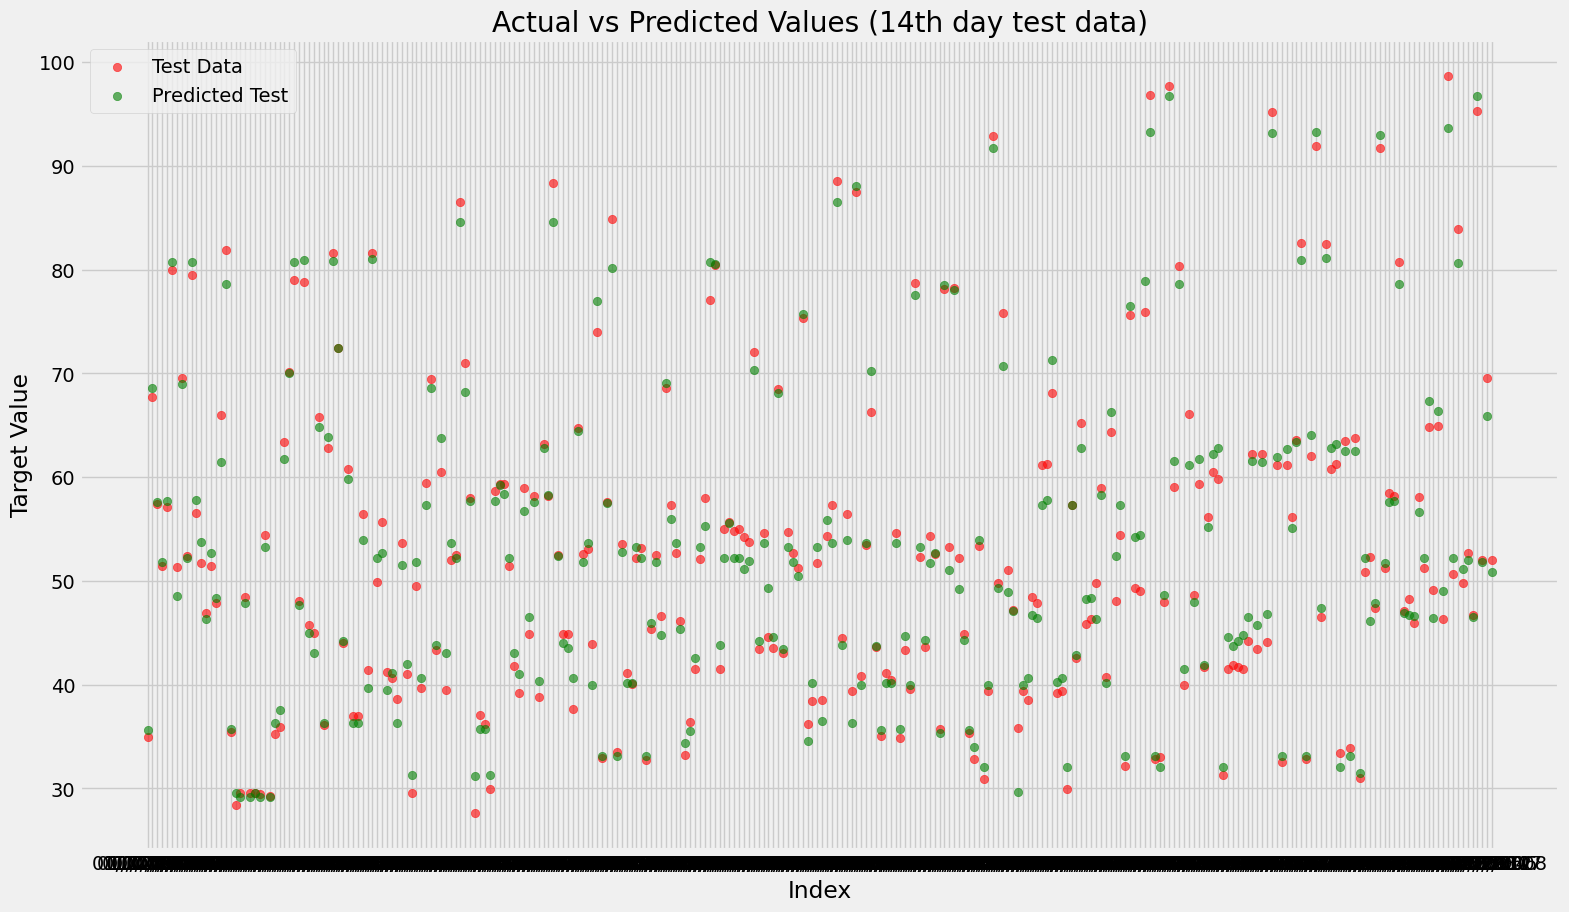

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_test is a DataFrame and y_test, y_test_pred are Series or arrays
# Combine X_test, y_test, and y_test_pred into a DataFrame for sorting
df_test = X_test.copy()
df_test['y_test'] = y_test
df_test['y_test_pred'] = y_test_pred

# Sort the DataFrame by index
df_test_sorted = df_test.sort_index()

# Extract the sorted values
X_test_sorted = df_test_sorted.index
y_test_sorted = df_test_sorted['y_test']
y_test_pred_sorted = df_test_sorted['y_test_pred']

# Plot the sorted data
plt.figure(figsize=(17, 10))
plt.scatter(X_test_sorted, y_test_sorted, color='red', label='Test Data', alpha=0.6)
plt.scatter(X_test_sorted, y_test_pred_sorted, color='green', label='Predicted Test', alpha=0.6)
plt.title('Actual vs Predicted Values (14th day test data)')
plt.xlabel('Index')
plt.ylabel('Target Value')

# Add legend
plt.legend()

# Show plot
plt.show()
